**1. Importing the essential libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from tensorflow import keras
from sklearn.metrics import confusion_matrix , classification_report
import io
import statistics as st

**2. Load the dataset.**

**Importing Churn_Modelling.csv dataset**

In [2]:
from google.colab import files

uploaded = files.upload()

Saving Churn_Modelling.csv to Churn_Modelling.csv


**Preprocess Dataset**

In [3]:
df = pd.read_csv(io.BytesIO(uploaded['Churn_Modelling.csv']))
print(df)

      RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMemb

In [4]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

**Removing Irrelevant columns**


In [5]:
df.drop(['RowNumber','CustomerId','Surname'], axis=1, inplace=True)

**3.Perform Visualizations.**

**Univariate Analysis**

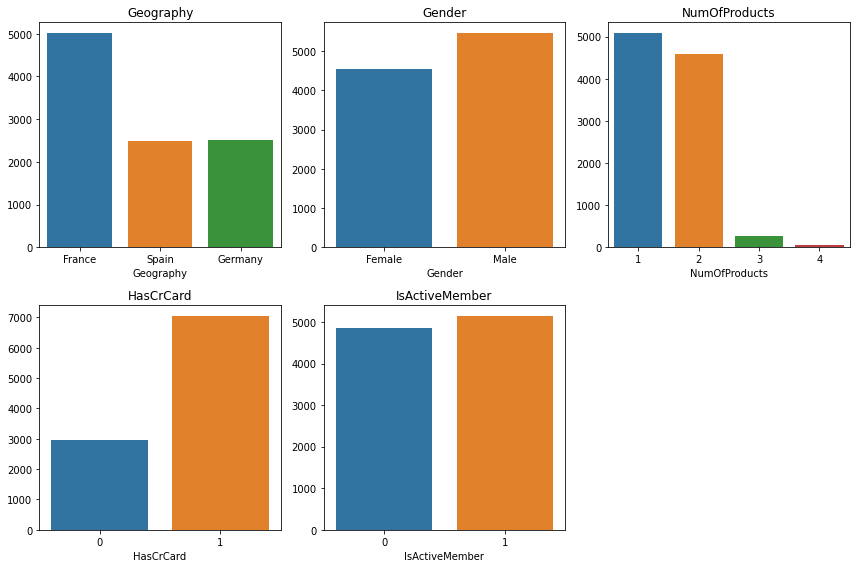

In [6]:
fig, axes = plt.subplots(2,3,figsize=(12,8))
valid_col =['Geography', 'Gender',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember']
for i, ax in enumerate(axes.flatten()):
    if i == 5:
        ax.axis('off')
        break
    sns.countplot(data=df,x=valid_col[i],ax=ax)
    ax.set_ylabel(None)
    ax.set_title(label=valid_col[i])
plt.tight_layout()

Observation from Univariate Analysis
* Most of the Customers are located in france
* Male customers are higher than that of Female customers
* Active and In Active members are more or less equal
* Most of the Customers own a credit card
* Most of the Customers atleast use 1 or 2 products from the bank

In [7]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

**Bivariate Analysis**

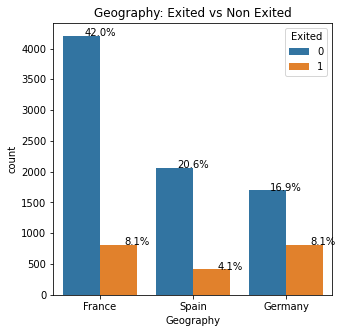

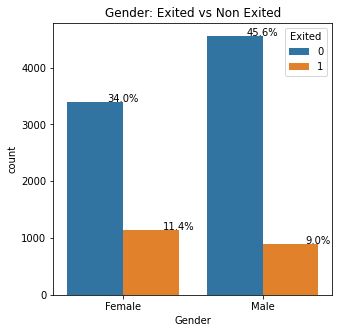

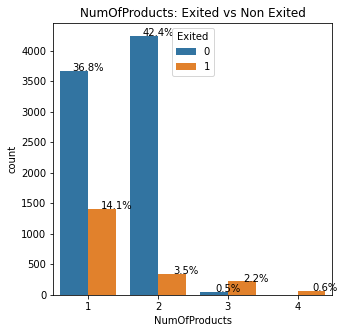

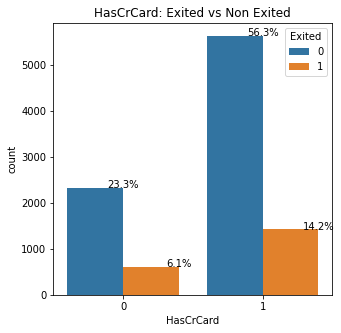

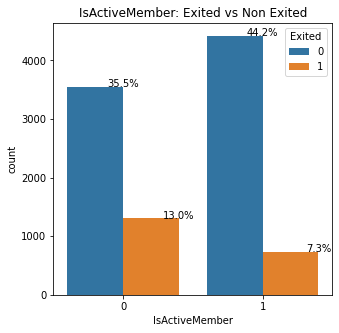

In [9]:
total=float(len(df))
Excepted_col=['Tenure','Age','CreditScore','Balance',"EstimatedSalary"]
Accepted_col=['Geography', 'Gender','NumOfProducts', 'HasCrCard', 'IsActiveMember']
for column in Accepted_col:
    fig, ax = plt.subplots(figsize=(5,5))
    sns.countplot(data=df,x=column,hue='Exited',ax=ax)
    ax.set_title(column+': Exited vs Non Exited')
    ax.set_ylabel('count')
    for i in ax.patches:
        percent = '{:.1f}%'.format(100 * i.get_height()/total)
        x=i.get_x() + i.get_width()
        y=i.get_height()
        ax.annotate(percent,(x,y),ha='center')
    plt.show()

Observation from Bivariate Analysis - Catergorical
* 42% People who are located in France havent exited compared to other countries.
* The churn % of Females are higher than Males
* Customers who use more than 2 products are less possible to exit
* Most of the customers who exit are inactive members
* Most of the customers who exit have a credit card

**Bivariate Analysis-Numerical variables** 

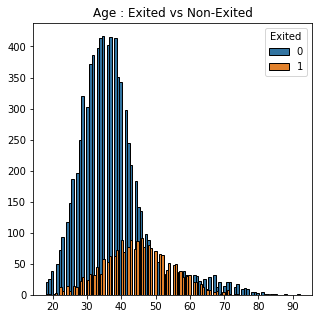

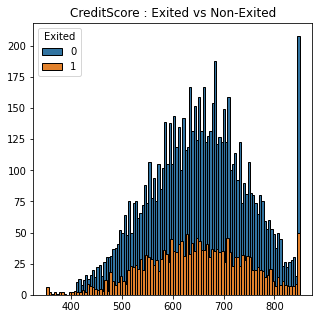

In [10]:
df_exited=df[df['Exited']==1]
df_not_exited=df[df['Exited']==0]
Excepted_col=['Age','CreditScore']
for column in Excepted_col:
    plt.figure(figsize=(5,5))
    plt.hist(x=column,bins=100,data=df_not_exited,edgecolor='black',color='#3274a1')
    plt.hist(x=column,bins=100,data=df_exited,edgecolor='black',color='#e1812c')
    plt.title(column+' : Exited vs Non-Exited')
    plt.legend([0,1],title='Exited')

Observation from Bivariate Analysis - Numerical
* Most of the people from Age 40 and above are exiting from the bank.
* From the boxplot visualized before, we can say that, customers who have more bank balance is exiting more.

**Multivariate Analysis**

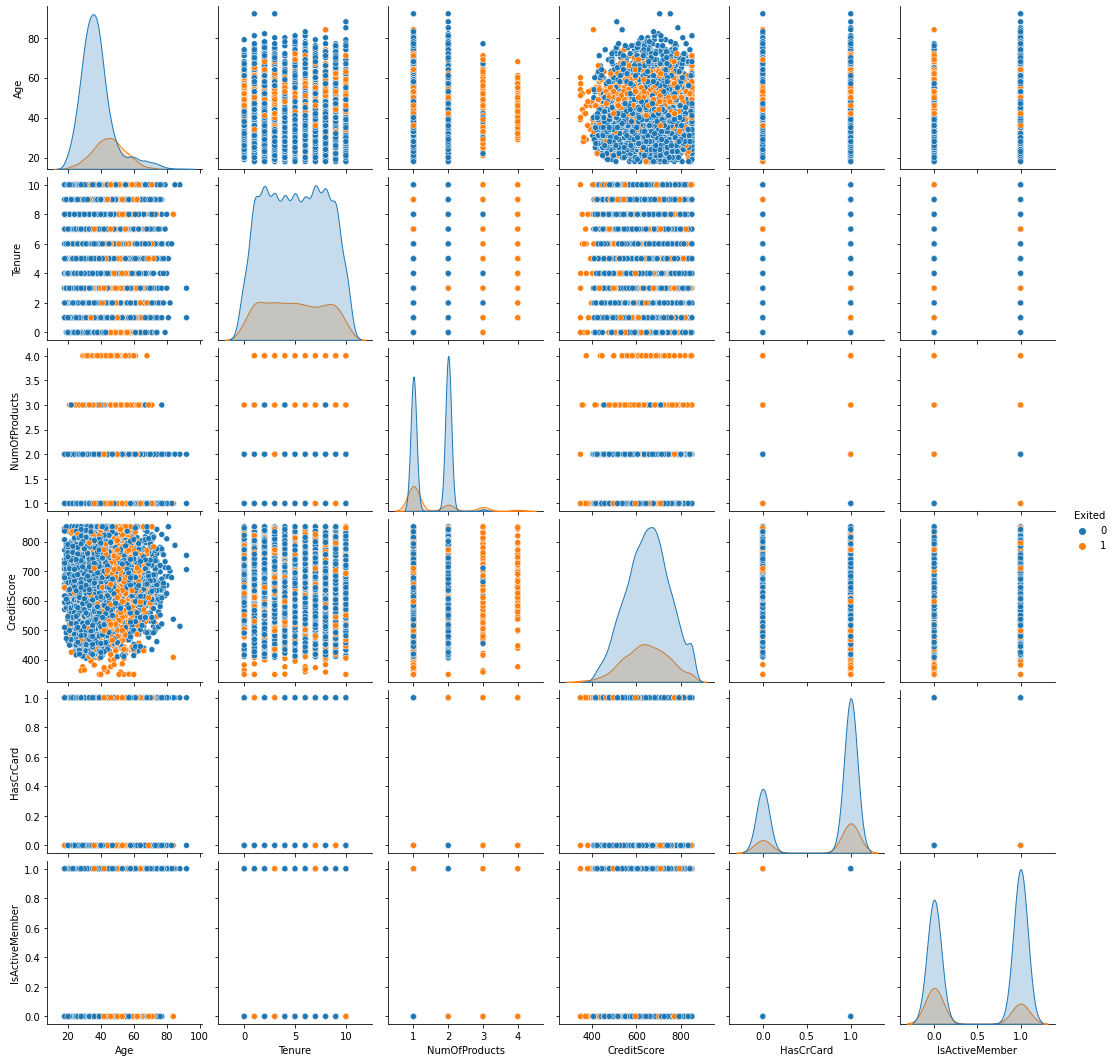

In [11]:
sns.pairplot(data=df[['Age', 'Tenure', 'NumOfProducts', 'CreditScore', 'HasCrCard', 'IsActiveMember', 'Exited' ]], hue='Exited')

**4. Perform descriptive statistics on the dataset.**

In [12]:
df.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


CreditScore           650.528800
Age                    38.921800
Tenure                  5.012800
Balance             76485.889288
NumOfProducts           1.530200
HasCrCard               0.705500
IsActiveMember          0.515100
EstimatedSalary    100090.239881
Exited                  0.203700
dtype: float64

In [13]:
df.std()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


CreditScore           96.653299
Age                   10.487806
Tenure                 2.892174
Balance            62397.405202
NumOfProducts          0.581654
HasCrCard              0.455840
IsActiveMember         0.499797
EstimatedSalary    57510.492818
Exited                 0.402769
dtype: float64

In [14]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [65]:
df.isnull().any()

CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

**5. Handle the Missing values.**

In [68]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [67]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Handling categorical variables

In [16]:
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender= pd.get_dummies(X['Gender'],drop_first=True)

In [17]:
X=pd.concat([X,geography,gender],axis=1)

In [18]:
X.drop(['Geography','Gender'],axis=1,inplace=True)
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


**6. Find the outliers and replace the outliers**

The “Age”, “Balance”, and “Gender” columns are positively correlated with customer churn (“Exited”). There is a negative correlation between being an active member (“IsActiveMember”) and customer churn.

If you compare “Balance” and “Balance_binary”, you will notice a very strong positive correlation since we created one based on the other.

Since “Age” turns out to have the highest correlation values, let’s dig in a little deeper.

In [19]:
df[['Exited','Age']].groupby('Exited').mean()

,Age
Exited,
0,37.408389
1,44.837997


The average age of churned customers is higher. We should also check the distribution of the “Age” column.

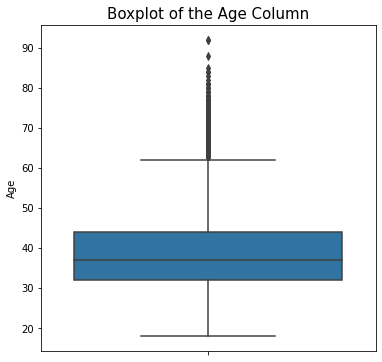

In [20]:
plt.figure(figsize=(6,6))
plt.title("Boxplot of the Age Column", fontsize=15)
sns.boxplot(y=df['Age'])

The dots above the upper line indicate outliers. Thus, there are many outliers on the upper side. Another way to check outliers is comparing the mean and median.

In [21]:
df['Age'].mean()

38.9218

In [22]:
df['Age'].median()

37.0

**Handling Outliers**

In [23]:
Q1 = np.quantile(df['Age'],0.95)


In [24]:
df = df[df['Age'] < Q1]

In [25]:
df.shape

(9474, 11)

In [26]:
df['Age'].mean()

37.383681655055945

In [27]:
df['Age'].median()

37.0

In [28]:
df[['Exited','Age']].groupby('Exited').mean()

,Age
Exited,
0,35.889504
1,43.379365


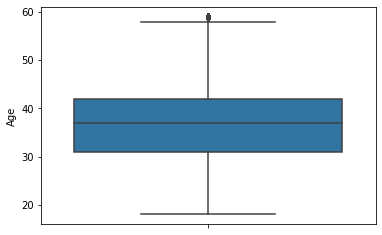

In [52]:
sns.boxplot(y=df['Age'])

**7. Check for Categorical columns and perform encoding.**

In [30]:
df_encoded = pd.get_dummies(df, columns=['Geography', 'Gender'],drop_first=True)
df_encoded.head(10)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
5,645,44,8,113755.78,2,1,0,149756.71,1,0,1,1
6,822,50,7,0.00,2,1,1,10062.80,0,0,0,1
7,376,29,4,115046.74,4,1,0,119346.88,1,1,0,0
8,501,44,4,142051.07,2,0,1,74940.50,0,0,0,1
9,684,27,2,134603.88,1,1,1,71725.73,0,0,0,1


In [31]:
cols_to_scale = ['CreditScore','Age','Tenure','Balance','EstimatedSalary']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_encoded[cols_to_scale] = scaler.fit_transform(df_encoded[cols_to_scale])

In [32]:
for col in df_encoded:
    print(f'{col}: {df_encoded[col].unique()}')

CreditScore: [0.538 0.516 0.304 0.698 1.    0.59  0.944 0.052 0.302 0.668 0.356 0.294
 0.252 0.398 0.57  0.532 0.606 0.474 0.752 0.764 0.572 0.32  0.638 0.992
 0.454 0.812 0.442 0.448 0.122 0.482 0.366 0.406 0.34  0.744 0.25  0.28
 0.908 0.464 0.244 0.23  0.968 0.852 0.958 0.574 0.4   0.696 0.47  0.876
 0.61  0.502 0.612 0.75  0.528 0.784 0.674 0.41  0.506 0.802 0.462 0.77
 0.622 0.65  0.776 0.926 0.614 0.508 0.338 0.628 0.656 0.814 0.132 0.63
 0.854 0.386 0.312 0.286 0.8   0.758 0.592 0.594 0.916 0.348 0.838 0.76
 0.33  0.846 0.928 0.72  0.126 0.546 0.544 0.87  0.51  0.258 0.67  0.376
 0.424 0.742 0.556 0.636 0.956 0.648 0.55  0.164 0.84  0.816 0.89  0.672
 0.878 0.478 0.222 0.468 0.458 0.626 0.664 0.886 0.682 0.27  0.6   0.808
 0.37  0.732 0.378 0.712 0.472 0.562 0.734 0.9   0.666 0.62  0.708 0.53
 0.634 0.268 0.26  0.456 0.324 0.512 0.494 0.856 0.328 0.35  0.73  0.46
 0.914 0.342 0.818 0.332 0.722 0.536 0.586 0.642 0.678 0.54  0.652 0.444
 0.69  0.484 0.434 0.64  0.688 0.394 0.488 0

**8. Split the data into dependent and independent variables.**

In [35]:
# independent and dependent variables
X= df.drop(['Exited'], axis = 1)
y = df['Exited']

**9. Scale the independent variables**

In [55]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X= sc.fit_transform(X)

In [62]:
X = pd.DataFrame(X)
X.head()

,0,1,2,3,4,5,6,7,8,9,10
0,2.070628,-1.253704,0.688164,-0.518605,0.823308,0.644858,1.003039,-1.690642,-0.572729,-0.574151,-1.100121
1,0.578160,0.071801,-0.004754,1.390582,0.823308,0.644858,1.003039,0.621241,1.746027,-0.574151,0.908991
2,-0.416819,-1.253704,1.381081,1.335040,-0.910948,-1.550729,1.003039,0.058582,-0.572729,-0.574151,-1.100121
3,0.505610,-1.133203,0.688164,-1.216832,0.823308,0.644858,1.003039,-1.347977,-0.572729,-0.574151,0.908991
4,-0.105888,-0.892202,-0.004754,-0.701895,-0.910948,-1.550729,1.003039,0.722054,1.746027,-0.574151,-1.100121


**10. Split the data into training and testing**

In [37]:
Dummies = pd.get_dummies(X[['Geography', 'Gender']],drop_first=True)
X = X.drop(['Geography', 'Gender'], axis = 1)
X = pd.concat([X, Dummies], axis = 1)

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [58]:
X_train.shape

(7579, 11)

In [59]:
X_test.shape

(1895, 11)

In [60]:
y_train.shape

(7579,)

In [61]:
y_test.shape

(1895,)